In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banfakenews/LabeledAuthentic-7K.csv
/kaggle/input/banfakenews/Authentic-48K.csv
/kaggle/input/banfakenews/Fake-1K.csv
/kaggle/input/banfakenews/LabeledFake-1K.csv


In [2]:
!python --version

Python 3.10.13


In [3]:
auth = pd.read_csv("../input/banfakenews/Authentic-48K.csv")
fake = pd.read_csv("../input/banfakenews/Fake-1K.csv")

In [4]:
auth.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [5]:
fake.head()

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


In [6]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

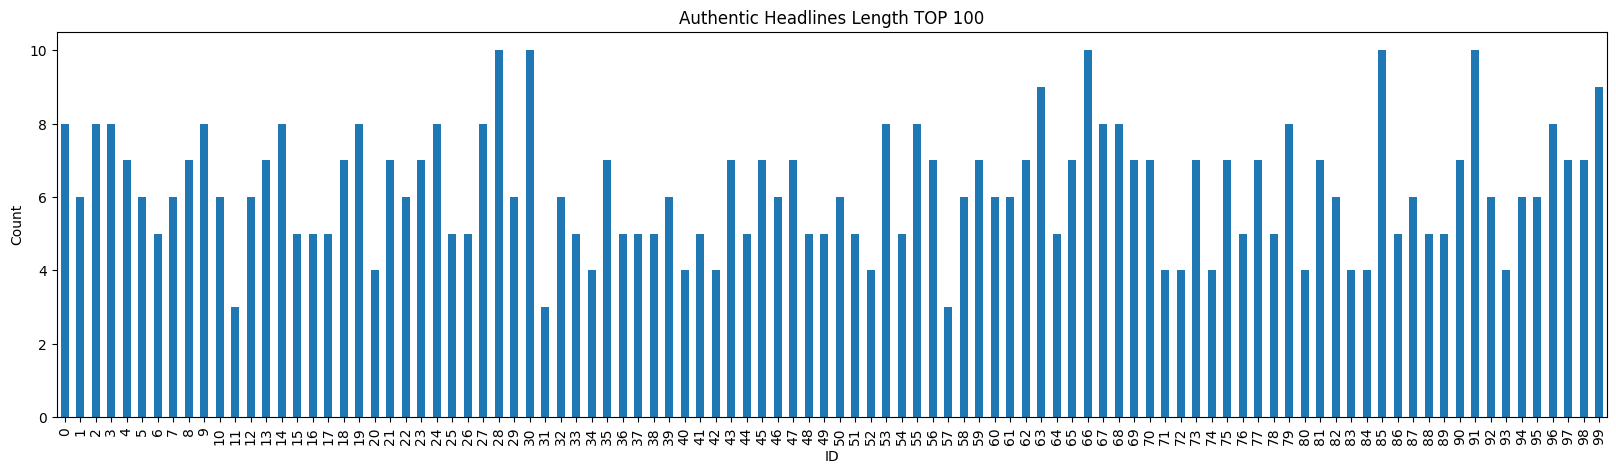

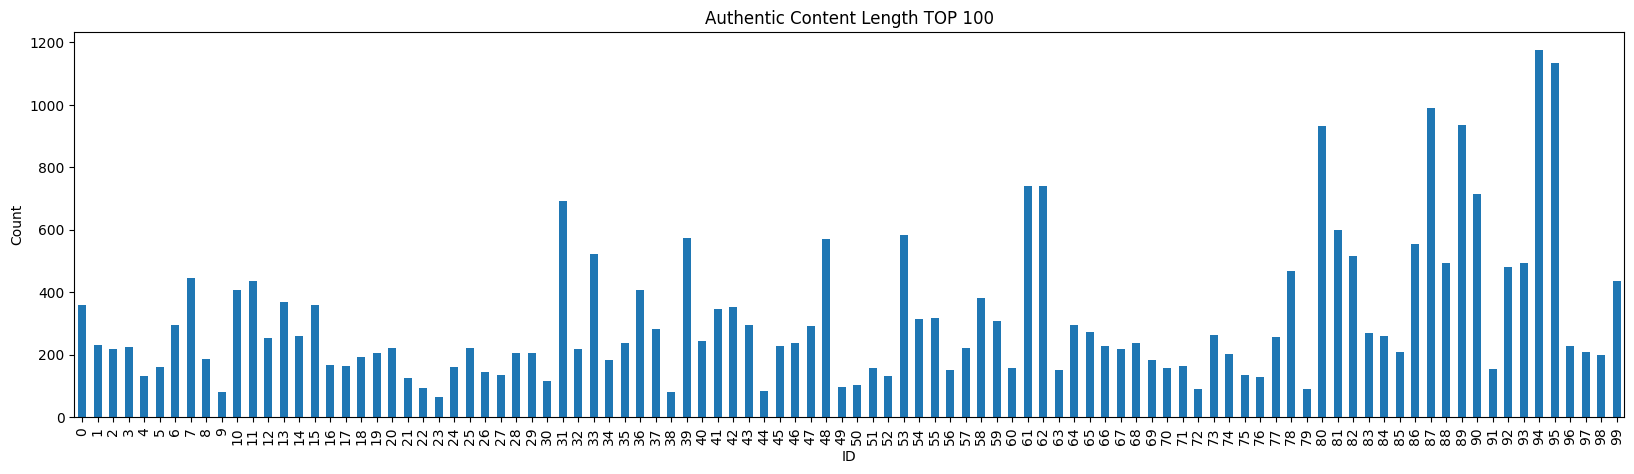

In [7]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

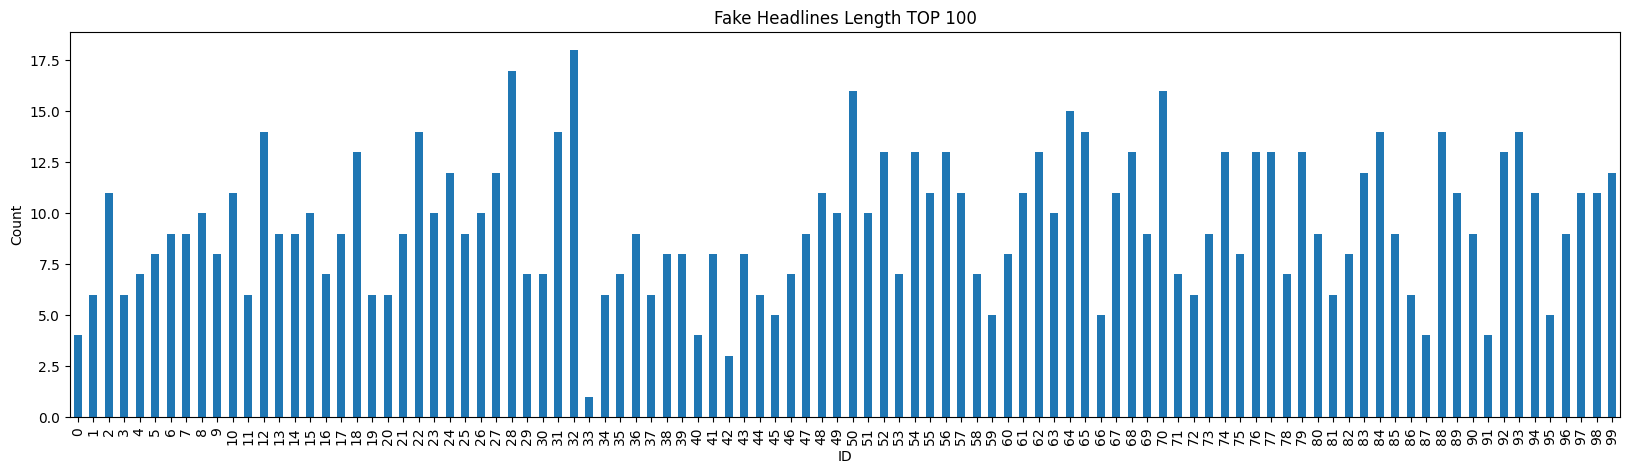

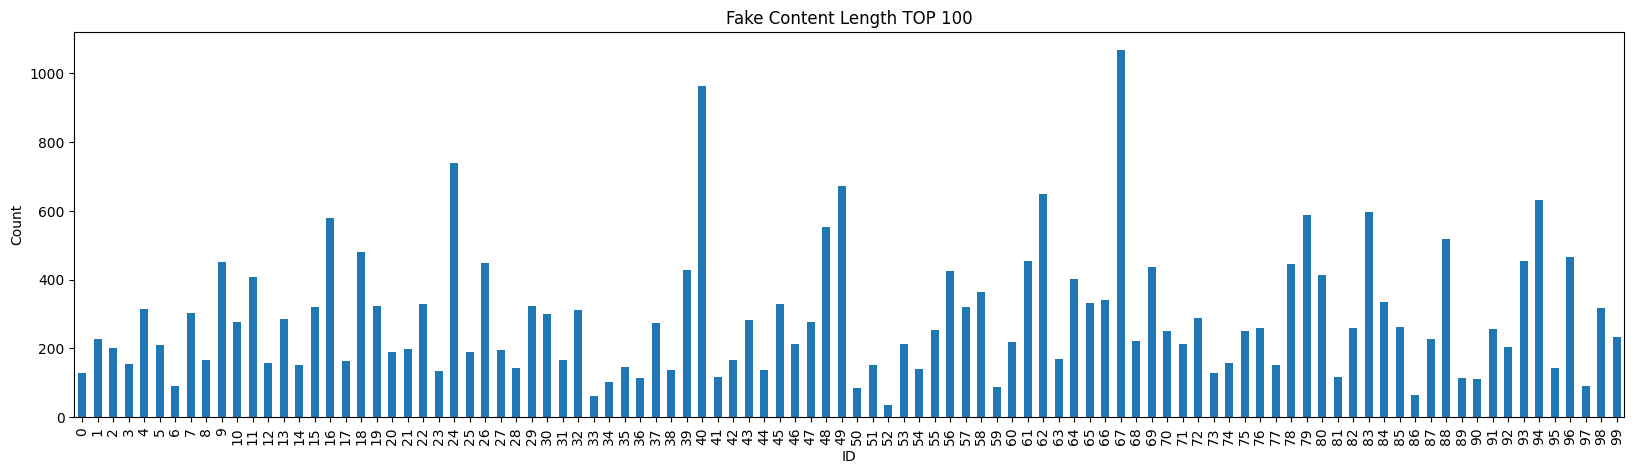

In [8]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

/tmp/ipykernel_24/3657808805.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


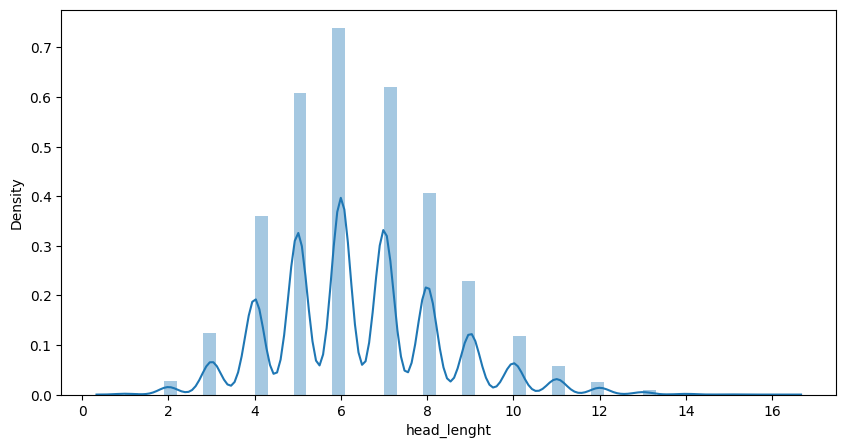

/tmp/ipykernel_24/3657808805.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


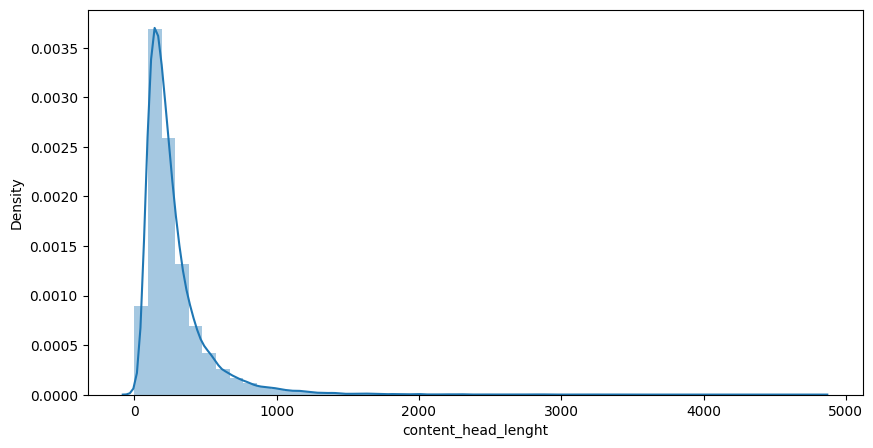

In [9]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

/tmp/ipykernel_24/3657808805.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


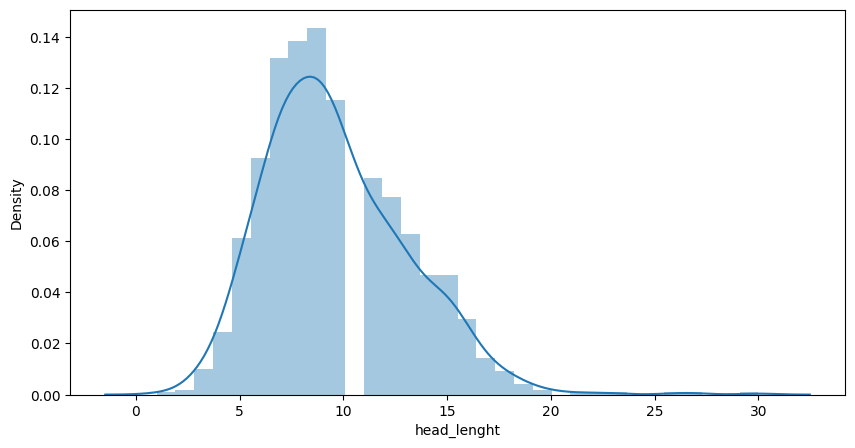

/tmp/ipykernel_24/3657808805.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


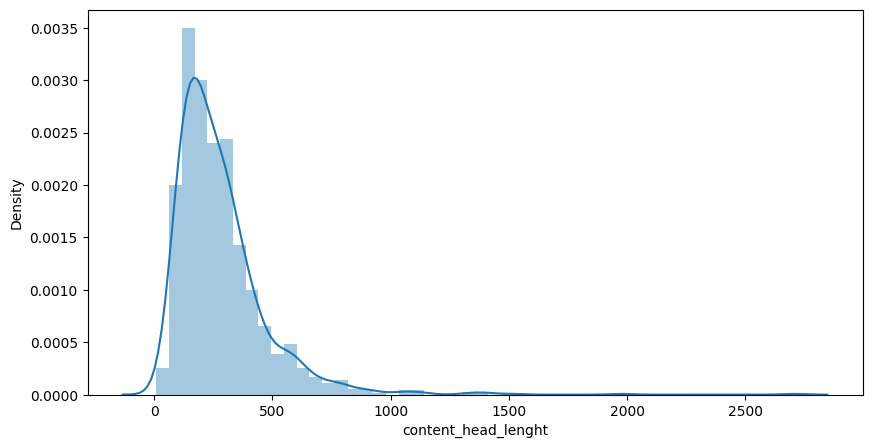

In [10]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

In [11]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2024-05-01 16:23:05--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 104.21.11.66, 172.67.165.83, 2606:4700:3037::6815:b42, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|104.21.11.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: '06-nikosh-bangla-font.zip'

06-nikosh-bangla-fo 100%[===================>] 310.45K   872KB/s    in 0.4s    

2024-05-01 16:23:06 (872 KB/s) - '06-nikosh-bangla-font.zip' saved [317905/317905]



In [12]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [13]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    font_path="Nikosh.ttf",
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

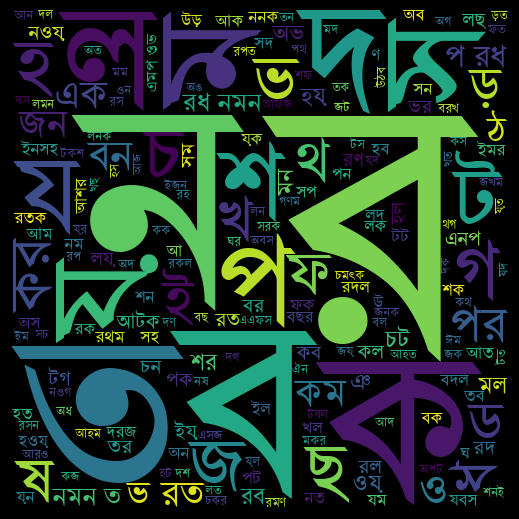

In [14]:
s= " ".join(auth.headline[:100])
plot_world(s)

In [15]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=0b4104ed43be71963b3850df8f816e7cb53353a0868cc352dfd1c7ee19cdefc3
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.11.0
    Uninstalling emoji-2.11.0:
      Successfully uninstalled emoji-2.11.0


In [16]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [17]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [18]:
auth_corpus = create_corpus(auth.headline[:1000])
print("Total auth tokens in 1000", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:1000])
print("Total auth tokens in 1000", len(fake_corpus))

Total auth tokens in 1000 7441
Total auth tokens in 1000 10458


In [19]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [20]:
from bnlp import BengaliCorpus as corpus
stopwords=corpus.stopwords
letters=corpus.letters
punctuations=corpus.punctuations
digits=corpus.digits

In [21]:
from collections import defaultdict
from collections import  Counter
from bnlp import BengaliCorpus as corpus
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


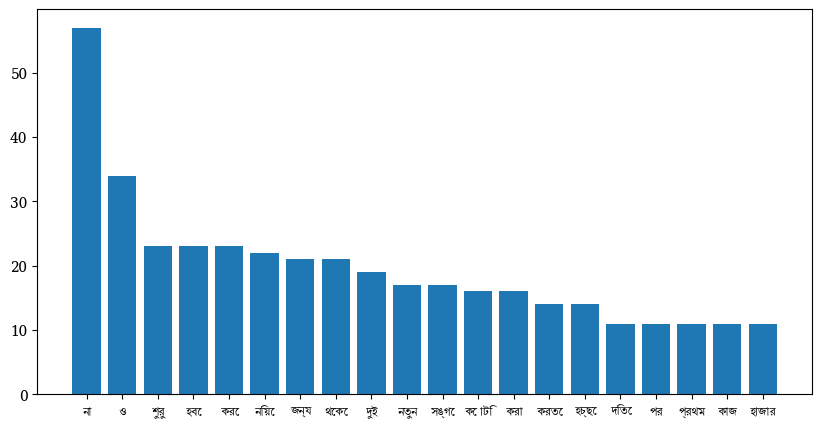

In [22]:
show_stop_words(auth_corpus)

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 52, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


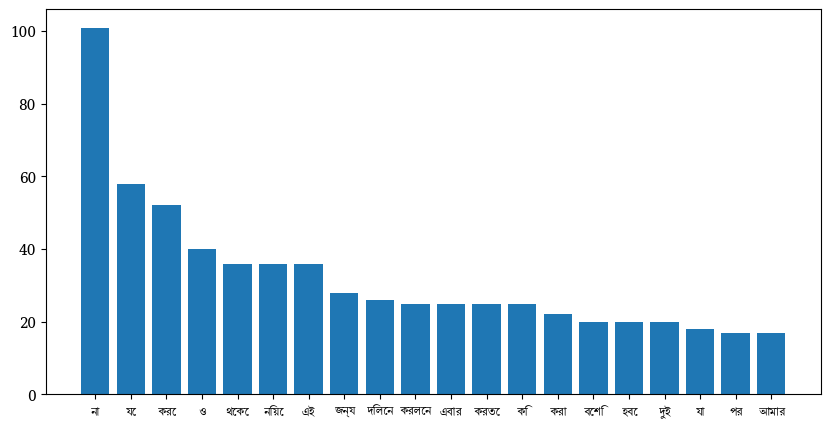

In [23]:
show_stop_words(fake_corpus)

In [24]:
# from bnlp.corpus import punctuations, digits

def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

In [25]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [26]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [27]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'ভারত', 'আটক', 'বাংলাদেশ', 'উদ্ধার')
(56, 52, 51, 45, 33, 25, 23, 21, 20, 20)


In [28]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'সাথে', 'দিয়ে', 'কারণে', 'শেখ')
(151, 151, 139, 139, 41, 29, 24, 21, 20, 19)


In [29]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

In [30]:
#pip install bitsandbytes

In [31]:
from transformers import AutoModel, AutoModelForSequenceClassification,  BitsAndBytesConfig

In [32]:
# model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base',
#           torch_dtype="auto")

In [33]:
pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
# # print(model_xlm.named_parameters)
# import peft

# # Config for the LoRA Injection via PEFT
# peft_config = peft.LoraConfig(
#     r=2, # rank dimension of the LoRA injected matrices
#     lora_alpha=8, # parameter for scaling, use 8 here to make it comparable with our own implementation
#     target_modules=['query', 'key', 'value', 'intermediate.dense', 'output.dense'], # be precise about dense because classifier has dense too
#     modules_to_save=["LayerNorm", "classifier", "qa_outputs"], # Retrain the layer norm; classifier is the fine-tune head; qa_outputs is for SQuAD
#     lora_dropout=0.1, # dropout probability for layers
#     bias="all", # none, all, or lora_only
# )

# model_xlm_LoRA = peft.get_peft_model(model, peft_config)

## Preprocessing

In [35]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data
        
        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [36]:
auth = pd.read_csv("../input/banfakenews/Authentic-48K.csv")
fake = pd.read_csv("../input/banfakenews/Fake-1K.csv")

df = auth[:fake.shape[0]* 7]
df = df._append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df)

10392

In [37]:
from bnlp import BasicTokenizer
# from bnlp.corpus import stopwords, punctuations, letters, digits

btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
    
        filtered.append(i)
    
    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
পরমাণু নিরস্ত্রীকরণে পুনরায় উত্তর কোরিয়ার সঙ্গে আলোচনায় বসতে প্রস্তুত আমেরিকা। এমনটি জানিয়েছেন মার্কিন পররাষ্ট্রমন্ত্রী মাইক পম্পেও। খবর রয়টার্সের।      চলতি বছরের জুন মাসে আমেরিকা প্রেসিডেন্ট ডোনাল্ড ট্রাম্প উত্তর কোরিয়ার প্রধান কিম জং উনের সঙ্গে ঐতিহাসিক আলোচনায় বসেন। ওই বৈঠকে পরমাণু নিরস্ত্রীকরণের ব্যাপারে দীর্ঘ আলোচনা হয়।   তারই ফলপ্রসূ হিসেবে এ সপ্তাহে উত্তর কোরিয়ার প্রধান নেতা কিম জং উন বড় ধরনের মিসাইল সাইট বন্ধে রাজি হন। অন্যদিকে দক্ষিণ কোরিয়ার প্রেসিডেন্ট মুন জায়ে, উত্তর কোরিয়ার কমপক্ষে দশ হাজার লোকের সামনে পরমাণু নিরস্ত্রীকরণের ব্যাপারে বক্তৃতা দেন।   এ ব্যাপারে পম্পেও বলেন, কিম পরমাণু নিরস্ত্রীকরণের ব্যাপারে রাজি হয়েছে। অনেক ইতিবাচক সিদ্ধান্তও নিয়েছে। শিগগিরই আমেরিকা উত্তর কোরিয়ার সঙ্গে আবার আলোচনায় বসছে।   তিনি আরও বলেন, ইতিমধ্যে আমরা উত্তর কোরিয়ার পররাষ্ট্রমন্ত্রী রি ইয়ং হোকে আলোচনার জন্য আহ্বান জানিয়েছি। পরবর্তী সপ্তাহে তিনি নিউইয়র্কে আসবেন।   ইত্তেফাক/এসআর   

********** After ***************
পরমাণু নিরস্ত্রীকরণে পুনরায় কোরিয়ার আলোচনায় বস

In [38]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [39]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])

In [40]:
len(train_df), len(test_df)

(8313, 2079)

In [41]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [42]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

In [43]:
train_df.to_csv("train.csv")

In [44]:
test_df.to_csv("test.csv")

## MODEL

In [45]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 128)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(128, 2)  

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        # output layer
        x = self.fc2(self.dropout(x))
        
        return x

In [46]:
# from transformers import AutoTokenizer

In [47]:
# tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [48]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

In [49]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = NewsBert(model_xlm_LoRA)
# model.to(device);

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device);

In [51]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[0.0143, 0.1499]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [52]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

In [53]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [54]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [55]:
epochs = 5
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [56]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    
    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.242155.. 	Valid Loss:0.156965.. 	Accuracy: 94.4685
Epoch: 2/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.134336.. 	Valid Loss:0.132833.. 	Accuracy: 95.6229
Epoch: 3/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.063312.. 	Valid Loss:0.165269.. 	Accuracy: 96.0077
Epoch: 4/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.058364.. 	Valid Loss:0.170858.. 	Accuracy: 95.9596
Epoch: 5/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.048556.. 	Valid Loss:0.174351.. 	Accuracy: 96.1039
Training completed in 13m 12s


In [57]:
# print(model_xlm.named_parameters)
import peft

# Config for the LoRA Injection via PEFT
peft_config = peft.LoraConfig(
    r=1, # rank dimension of the LoRA injected matrices
    lora_alpha=1, # parameter for scaling, use 8 here to make it comparable with our own implementation
    target_modules=['query', 'value'], #'value', 'intermediate.dense', 'output.dense'], # be precise about dense because classifier has dense too
    #modules_to_save=["LayerNorm", "classifier", "qa_outputs"], # Retrain the layer norm; classifier is the fine-tune head; qa_outputs is for SQuAD
    lora_dropout=0.1, # dropout probability for layers
    bias="all",
    #task_type=peft.TaskType.SEQ_CLS, # none, all, or lora_only
)

model_bert_LoRA = peft.get_peft_model(bert, peft_config)

In [58]:
model_LORA = NewsBert(model_bert_LoRA)
model_LORA.to(device);

In [59]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model_LORA.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

In [60]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model_LORA, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model_LORA, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    
    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model_LORA.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.100784.. 	Valid Loss:0.146771.. 	Accuracy: 96.1039
Epoch: 2/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.043814.. 	Valid Loss:0.159177.. 	Accuracy: 96.0077
Epoch: 3/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.045770.. 	Valid Loss:0.159762.. 	Accuracy: 96.0077
Epoch: 4/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.044310.. 	Valid Loss:0.160081.. 	Accuracy: 96.0077
Epoch: 5/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.047250.. 	Valid Loss:0.160131.. 	Accuracy: 96.0077
Training completed in 13m 25s


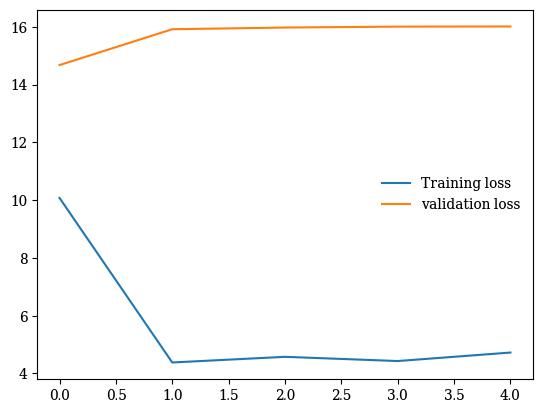

In [61]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)